# DATA NORMALIZATION
This process allows the values in our dataset to share a common property or be bound by a specific limit
There are multiple normalization techniques:
    -**Z-score normalization:** Data is transformed, such that mean is 0 and standard deviation is 1
    This is suitable in most cases unless provided with upper and lower bounds
    $NormalizedValue = (value - mean)/StandardDeviation$
    -**Min max normalization:** Data is transformed using an upper and lower bound set by the user
    $NormalizedValue = [{(value-min)/(max-min)}*(upper-lower)]+lower$
    This is suitable for cases without outliers
    -**Logarithmic transformation:** Data is transformed by replacing the values with its logarithm
    $NormalizedValue = log(value)$
    This is suitable in cases where there are outlier values

In [5]:
import pandas as pd
%matplotlib inline

In [6]:
music = pd.read_csv("data/songs_normalize.csv")
music.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [7]:
music[["duration_ms"]].describe()

,duration_ms
count,2000.000000
mean,228748.124500
std,39136.569008
min,113000.000000
25%,203580.000000
50%,223279.500000
75%,248133.000000
max,484146.000000


<AxesSubplot:ylabel='Frequency'>

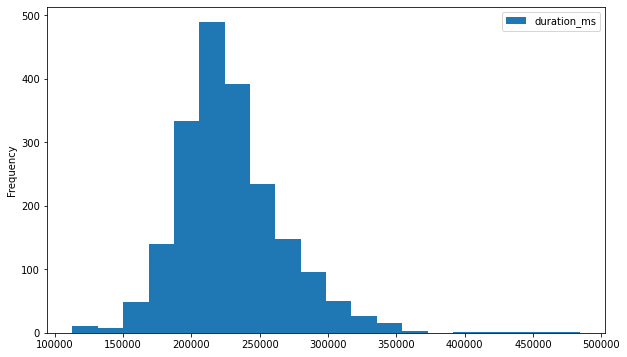

In [9]:
# bins represent the number of histogram bars in our graph
music[["duration_ms"]].plot(kind="hist", bins=20, figsize=(10, 6))

**scikit-learn** package provides us with various tools and functions used for data transformation
We will use the **min-max scaler** object from the **preprocessing** subpackage

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# The working of the min-max algorithm has been explained in the first block
duration_minmax = MinMaxScaler().fit_transform(music[["duration_ms"]])
duration_minmax
# From the output, we can see the values under the "duration_ms" feature have been normalized

array([[0.26447813],
       [0.14567313],
       [0.37059809],
       ...,
       [0.23600685],
       [0.15635087],
       [0.27557888]])

In [14]:
# We will fit the above data in a pandas DataFrame
duration_minmax = pd.DataFrame(duration_minmax, columns=["Duration in ms"])
duration_minmax

,Duration in ms
0,0.264478
1,0.145673
2,0.370598
3,0.300402
4,0.235918
...,...
1995,0.183286
1996,0.176281
1997,0.236007
1998,0.156351


In [15]:
duration_minmax.describe()
# We can compare this data with the previously described data
# Thus we can see the results of min-max algorithm. The minimum bound is now 0 and the maximum bound has been set to 1

,Duration in ms
count,2000.000000
mean,0.311867
std,0.105448
min,0.000000
25%,0.244055
50%,0.297132
75%,0.364097
max,1.000000


<AxesSubplot:ylabel='Frequency'>

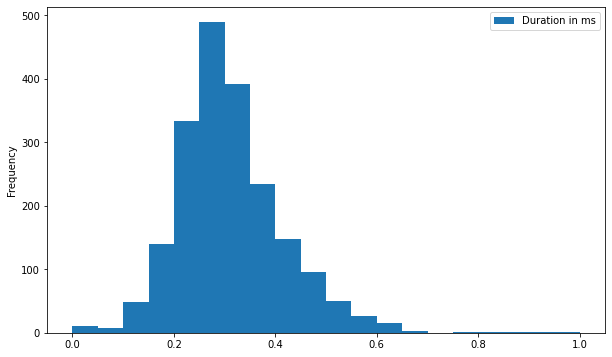

In [18]:
duration_minmax.plot(kind="hist", bins=20, figsize=(10, 6))

For this case, we can also perform the **z-score normalization** in the following way

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# We will now perform the same steps we did while
duration_zscore = StandardScaler().fit_transform(music[["duration_ms"]])
duration_zscore = pd.DataFrame(duration_zscore, columns=["Duration in ms"])
duration_zscore

,Duration in ms
0,-0.449516
1,-1.576468
2,0.557109
3,-0.108752
4,-0.720430
...,...
1995,-1.219679
1996,-1.286130
1997,-0.719587
1998,-1.475182


In [24]:
duration_zscore.describe()
# The changes after applying zscore algorithm can be seen after comparing the output to the initial data
# We can see that the standard deviation has become 1 and the minimum and maximum value has become (-2.95) and 6.92 respectively. The mean is also 0

,Duration in ms
count,2.000000e+03
mean,-1.421085e-16
std,1.000250e+00
min,-2.958284e+00
25%,-6.432454e-01
50%,-1.397668e-01
75%,4.954375e-01
max,6.527444e+00


<AxesSubplot:ylabel='Frequency'>

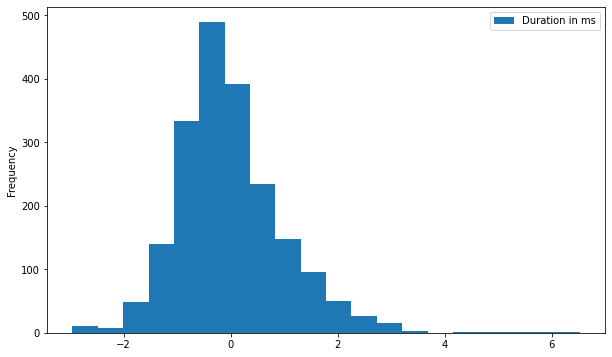

In [23]:
duration_zscore.plot(kind="hist", bins=20, figsize=(10, 6))

Thus we can see from all the histograms, that even after normalizing our data, the actual feature values never change, only specific property or the limits of the dataset have been changed